In [127]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [128]:
X,y = make_classification(n_features = 5, n_redundant = 0, n_informative = 5, n_clusters_per_class = 1)

In [129]:
df = pd.DataFrame(X, columns = ["col1", "col2", "col3", "col4", "col5"])
df["target"] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.582413,1.228594,0.651436,0.223723,1.007967,0
1,-0.254921,1.376069,2.980657,2.502444,-0.802091,1
2,-0.942192,0.044610,0.853697,2.460789,-0.202895,1
3,-2.545959,1.029097,2.083467,1.963722,-0.404573,1
4,-0.580664,1.379069,-1.052117,-0.203153,-1.297876,0


In [130]:
# function for row sampling
def sample_rows(df, percent):
  return df.sample(int(percent * df.shape[0]), replace = True)

In [131]:
# function for feature(column) sampling
def sample_features(df, percent):
  cols = random.sample(df.columns.tolist()[:-1], int(percent * (df.shape[1]-1)))
  new_df = df[cols]
  new_df["target"] = df["target"]
  return new_df

In [132]:
#function for combined sampling
def combined_sampling(df, row_percent, col_percent):
  new_df = sample_rows(df, row_percent)
  return sample_features(new_df, col_percent)

In [125]:
df1 = sample_rows(df, 0.2)

In [126]:
df2 = sample_rows(df, 0.2)

In [63]:
df3 = sample_rows(df, 0.2)

In [64]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [65]:
clf1.fit(df1.iloc[:,0:5], df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5], df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5], df3.iloc[:,-1])

DecisionTreeClassifier()

In [66]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[0] <= 0.538\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.6, 0.5, 'x[2] <= 2.263\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

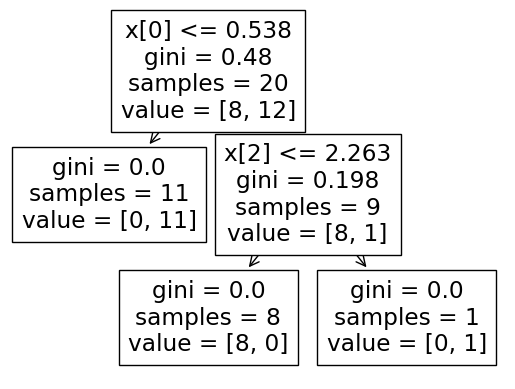

In [67]:
plot_tree(clf1)

[Text(0.375, 0.875, 'x[4] <= -0.816\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5, 0.625, 'x[3] <= 0.035\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.25, 0.375, 'x[4] <= 1.05\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.375, 'x[1] <= -2.926\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

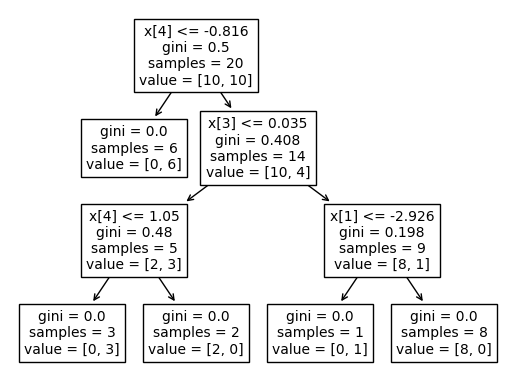

In [68]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[2] <= 1.211\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.4, 0.5, 'x[4] <= 1.062\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]')]

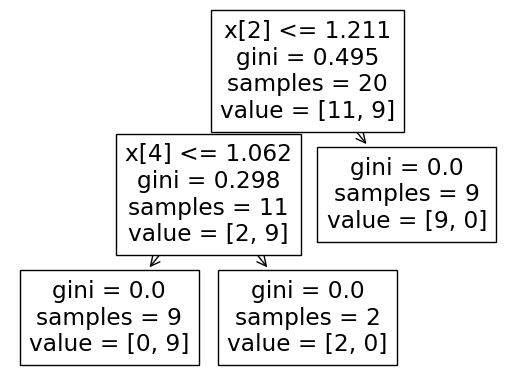

In [69]:
plot_tree(clf3)

In [70]:
clf1.predict(np.array([0.280958,0.138438,-0.169310,0.986667,-0.193575]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [71]:
clf2.predict(np.array([0.280958,0.138438,-0.169310,0.986667,-0.193575]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [72]:
clf3.predict(np.array([0.280958,0.138438,-0.169310,0.986667,-0.193575]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [86]:
df1 = sample_features(df, 0.8)

<ipython-input-85-33193cca5e8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"] = df["target"]


In [87]:
df2 = sample_features(df, 0.8)

<ipython-input-85-33193cca5e8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"] = df["target"]


In [88]:
df3 = sample_features(df, 0.8)

<ipython-input-85-33193cca5e8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"] = df["target"]


In [90]:
df3

,col4,col5,col2,col1,target
0,-1.047075,-1.253992,0.210839,-1.963525,1
1,-1.616319,0.275404,-1.321185,-2.440081,1
2,1.599039,-0.297686,0.003179,-2.377348,0
3,-1.514738,1.957791,0.230523,0.496596,0
4,0.165703,-3.645530,-0.295711,1.380346,1
...,...,...,...,...,...
95,-1.254777,-0.775777,1.523105,-1.160171,1
96,-0.641910,-0.724774,-0.587294,0.338666,0
97,0.113613,-2.826123,-2.463673,1.437914,0
98,-0.253526,-3.224605,1.057743,1.481481,1


In [91]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [92]:
clf1.fit(df1.iloc[:,0:4], df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4], df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4], df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5657894736842105, 0.9375, 'x[2] <= -0.225\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.34210526315789475, 0.8125, 'x[1] <= 0.22\ngini = 0.256\nsamples = 53\nvalue = [8, 45]'),
 Text(0.21052631578947367, 0.6875, 'x[1] <= -2.811\ngini = 0.136\nsamples = 41\nvalue = [3, 38]'),
 Text(0.10526315789473684, 0.5625, 'x[3] <= 0.305\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05263157894736842, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15789473684210525, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3157894736842105, 0.5625, 'x[2] <= -0.785\ngini = 0.097\nsamples = 39\nvalue = [2, 37]'),
 Text(0.2631578947368421, 0.4375, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.3684210526315789, 0.4375, 'x[0] <= 0.362\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.3157894736842105, 0.3125, 'x[1] <= -1.458\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.2631578947368421, 0.1875, 'x[2] <= -0.463\ngini = 0.444\nsamples = 3\nvalue =

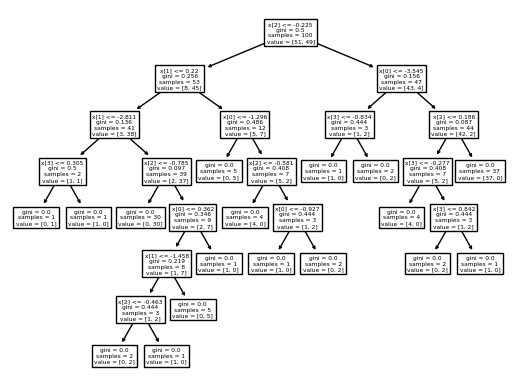

In [93]:
plot_tree(clf1)

[Text(0.5657894736842105, 0.9375, 'x[3] <= -0.225\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.34210526315789475, 0.8125, 'x[2] <= 0.22\ngini = 0.256\nsamples = 53\nvalue = [8, 45]'),
 Text(0.21052631578947367, 0.6875, 'x[2] <= -2.811\ngini = 0.136\nsamples = 41\nvalue = [3, 38]'),
 Text(0.10526315789473684, 0.5625, 'x[3] <= -2.204\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05263157894736842, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15789473684210525, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3157894736842105, 0.5625, 'x[3] <= -0.785\ngini = 0.097\nsamples = 39\nvalue = [2, 37]'),
 Text(0.2631578947368421, 0.4375, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.3684210526315789, 0.4375, 'x[3] <= -0.774\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.3157894736842105, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42105263157894735, 0.3125, 'x[2] <= -1.458\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Tex

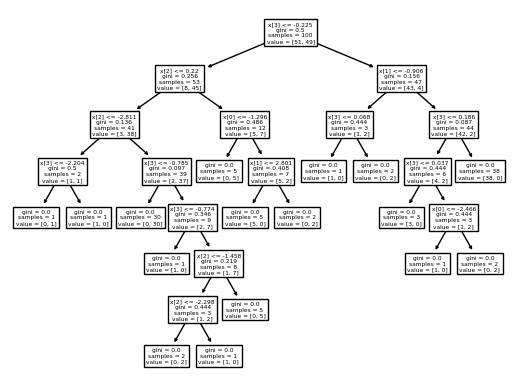

In [94]:
plot_tree(clf2)

[Text(0.5657894736842105, 0.9375, 'x[0] <= -0.225\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.34210526315789475, 0.8125, 'x[3] <= 0.22\ngini = 0.256\nsamples = 53\nvalue = [8, 45]'),
 Text(0.21052631578947367, 0.6875, 'x[3] <= -2.811\ngini = 0.136\nsamples = 41\nvalue = [3, 38]'),
 Text(0.10526315789473684, 0.5625, 'x[1] <= -0.112\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05263157894736842, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15789473684210525, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3157894736842105, 0.5625, 'x[0] <= -0.785\ngini = 0.097\nsamples = 39\nvalue = [2, 37]'),
 Text(0.2631578947368421, 0.4375, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.3684210526315789, 0.4375, 'x[0] <= -0.774\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.3157894736842105, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42105263157894735, 0.3125, 'x[3] <= -1.458\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Tex

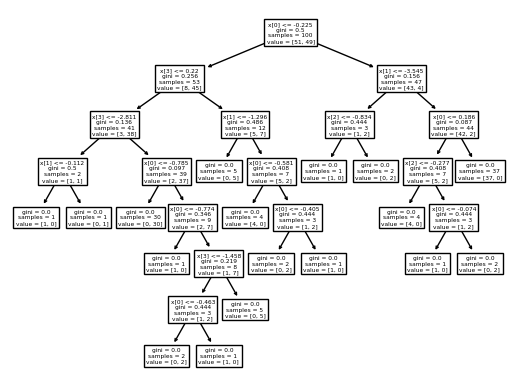

In [95]:
plot_tree(clf3)

In [96]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col1', 'col4', 'col2', 'target'], dtype='object')
Index(['col5', 'col3', 'col1', 'col4', 'target'], dtype='object')
Index(['col4', 'col5', 'col2', 'col1', 'target'], dtype='object')


In [99]:
df3

,col4,col5,col2,col1,target
0,-1.047075,-1.253992,0.210839,-1.963525,1
1,-1.616319,0.275404,-1.321185,-2.440081,1
2,1.599039,-0.297686,0.003179,-2.377348,0
3,-1.514738,1.957791,0.230523,0.496596,0
4,0.165703,-3.645530,-0.295711,1.380346,1
...,...,...,...,...,...
95,-1.254777,-0.775777,1.523105,-1.160171,1
96,-0.641910,-0.724774,-0.587294,0.338666,0
97,0.113613,-2.826123,-2.463673,1.437914,0
98,-0.253526,-3.224605,1.057743,1.481481,1


In [100]:
clf1.predict(np.array([-1.047075,-1.253992,0.210839,-1.963525]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [101]:
clf2.predict(np.array([-1.047075,-1.253992,0.210839,-1.963525]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [102]:
clf3.predict(np.array([-1.047075,-1.253992,0.210839,-1.963525]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [140]:
df1 = combined_sampling(df, 0.5,0.5)

<ipython-input-131-33193cca5e8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"] = df["target"]


In [141]:
df2 = combined_sampling(df, 0.5,0.5)

<ipython-input-131-33193cca5e8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"] = df["target"]


In [142]:
df3 = combined_sampling(df, 0.5,0.5)

<ipython-input-131-33193cca5e8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"] = df["target"]


In [143]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col2', 'target'], dtype='object')
Index(['col3', 'col2', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')


In [144]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [145]:
clf1.fit(df1.iloc[:,0:2], df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2], df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2], df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.3333333333333333, 0.95, 'x[0] <= -0.611\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.16666666666666666, 0.85, 'x[0] <= -0.873\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.08333333333333333, 0.75, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.25, 0.75, 'x[0] <= -0.724\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.65, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.85, 'x[1] <= 1.141\ngini = 0.401\nsamples = 36\nvalue = [26, 10]'),
 Text(0.4166666666666667, 0.75, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.5833333333333334, 0.75, 'x[1] <= 1.277\ngini = 0.486\nsamples = 24\nvalue = [14, 10]'),
 Text(0.5, 0.65, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.65, 'x[1] <= 3.565\ngini = 0.444\nsamples = 21\nvalue = [14, 7]'),
 Text(0.5833333333333334, 0.55, 'x[0] <= -0.198\ngini = 0.388\nsamples = 19\nvalue 

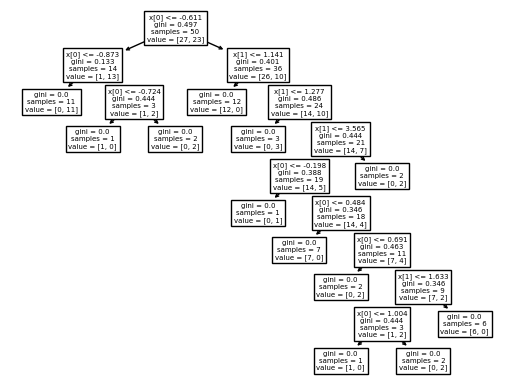

In [146]:
plot_tree(clf1)

[Text(0.5555555555555556, 0.9166666666666666, 'x[0] <= 0.042\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.3333333333333333, 0.75, 'x[1] <= 0.417\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.2222222222222222, 0.5833333333333334, 'x[0] <= -1.275\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1111111111111111, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4444444444444444, 0.5833333333333334, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.7777777777777778, 0.75, 'x[0] <= 1.255\ngini = 0.128\nsamples = 29\nvalue = [2, 27]'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[0] <= 1.122\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.5555555555555556, 0.4166666666666667, 'x[1] <= 1.761\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.4444444444444444, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.6666666666666666

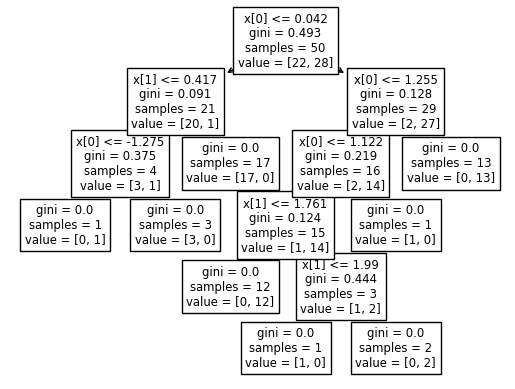

In [147]:
plot_tree(clf2)

[Text(0.2897727272727273, 0.9375, 'x[1] <= -0.129\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.13636363636363635, 0.8125, 'x[0] <= 0.32\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.09090909090909091, 0.6875, 'x[0] <= 0.037\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.045454545454545456, 0.5625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.13636363636363635, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.18181818181818182, 0.6875, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.4431818181818182, 0.8125, 'x[0] <= -0.017\ngini = 0.342\nsamples = 32\nvalue = [7, 25]'),
 Text(0.2727272727272727, 0.6875, 'x[0] <= -0.487\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.22727272727272727, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3181818181818182, 0.5625, 'x[0] <= -0.141\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2727272727272727, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.363636363636363

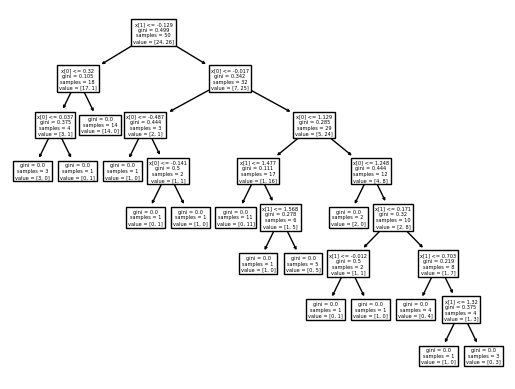

In [148]:
plot_tree(clf3)

In [149]:
df1

,col1,col2,target
97,-0.613109,0.763048,1
55,-1.865171,0.148206,1
77,5.622637,-0.742217,0
57,-0.951024,-0.174119,1
68,0.742761,2.240264,0
60,3.395160,0.670760,0
34,0.309551,1.776235,0
19,2.524000,1.663406,0
22,0.695446,3.739378,1
16,0.657985,2.051867,1


In [150]:
clf1.predict(np.array([1.284819,1.602904]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [151]:
clf2.predict(np.array([1.284819,1.602904]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [152]:
clf3.predict(np.array([1.284819,1.602904]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])